In [3]:
import os

import numpy as np
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt


import cv2
from sklearn.utils import shuffle
from keras.utils import np_utils

In [4]:
def load_samples(csv_file):
    data = pd.read_csv(os.path.join('data',csv_file))
    data = data[['img_file','cat_id','cat_name']]
    file_names = list(data.iloc[:,0])    
    labels = list(data.iloc[:,1])
    label_names = list(data.iloc[:,2])
    samples=[]
    for samp,lab in zip(file_names,labels):
        samples.append([samp,lab])
    return samples

In [5]:
data = pd.read_csv(os.path.join('data','meta_df.csv'))
data = data[['img_file', 'cat_name','cat_id']]
data

,img_file,cat_name,cat_id
0,train\apple_1.png,Apple,1
1,train\apple_2.png,Apple,1
2,train\apple_3.png,Apple,1
3,train\apple_4.png,Apple,1
4,train\apple_5.png,Apple,1
5,train\apple_6.png,Apple,1
6,train\apple_7.jpg,Apple,1
7,train\apple_8.jpg,Apple,1


In [6]:
data_path = 'meta_df.csv'
samples = load_samples(data_path)
#print(samples[0])
samples = shuffle(samples,random_state=32)
#print(samples[0])
print('total no of images: ',len(samples))
train_sample = samples
test_sample = samples[int((len(samples) - len(samples)*.25)): ]
print('total no of train images: ',len(train_sample))
print('total no of test images: ',len(test_sample))

total no of images:  8
total no of train images:  8
total no of test images:  2


In [7]:
train_sample

[['train\\apple_7.jpg', 1],
 ['train\\apple_2.png', 1],
 ['train\\apple_1.png', 1],
 ['train\\apple_3.png', 1],
 ['train\\apple_5.png', 1],
 ['train\\apple_6.png', 1],
 ['train\\apple_4.png', 1],
 ['train\\apple_8.jpg', 1]]

In [8]:
root_dir = r'C:\Users\91882\Desktop\LUX.Ai\Apple classification\data\data'

In [9]:
def generator(samples, batch_size=32,shuffle_data=True,resize=300):
    """
    Yields the next training batch.
    Suppose `samples` is an array [[image1_filename,label1], [image2_filename,label2],...].
    """
    num_samples = len(samples)
    while True:


        
        for offset in range(0, num_samples, batch_size):            
            batch_samples = samples[offset:offset+batch_size]            
            X_train = []
            y_train = []            
            for batch_sample in batch_samples:                
                img_name = batch_sample[0]
                label = batch_sample[1]
                img =  cv2.imread(os.path.join(root_dir,img_name))
                print(os.path.join(root_dir,img_name))
                img = cv2.resize(img,(resize,resize))
                X_train.append(img)
                y_train.append(label)
            X_train = np.array(X_train)
            y_train = np.array(y_train)            
            yield X_train, y_train

In [10]:
datagen = generator(samples,batch_size=8)
x,y = next(datagen)

C:\Users\91882\Desktop\LUX.Ai\Apple classification\data\data\train\apple_7.jpg
C:\Users\91882\Desktop\LUX.Ai\Apple classification\data\data\train\apple_2.png
C:\Users\91882\Desktop\LUX.Ai\Apple classification\data\data\train\apple_1.png
C:\Users\91882\Desktop\LUX.Ai\Apple classification\data\data\train\apple_3.png
C:\Users\91882\Desktop\LUX.Ai\Apple classification\data\data\train\apple_5.png
C:\Users\91882\Desktop\LUX.Ai\Apple classification\data\data\train\apple_6.png
C:\Users\91882\Desktop\LUX.Ai\Apple classification\data\data\train\apple_4.png
C:\Users\91882\Desktop\LUX.Ai\Apple classification\data\data\train\apple_8.jpg


In [11]:
print ('x_shape: ', x.shape)
print ('labels: ', y)

x_shape:  (8, 300, 300, 3)
labels:  [1 1 1 1 1 1 1 1]


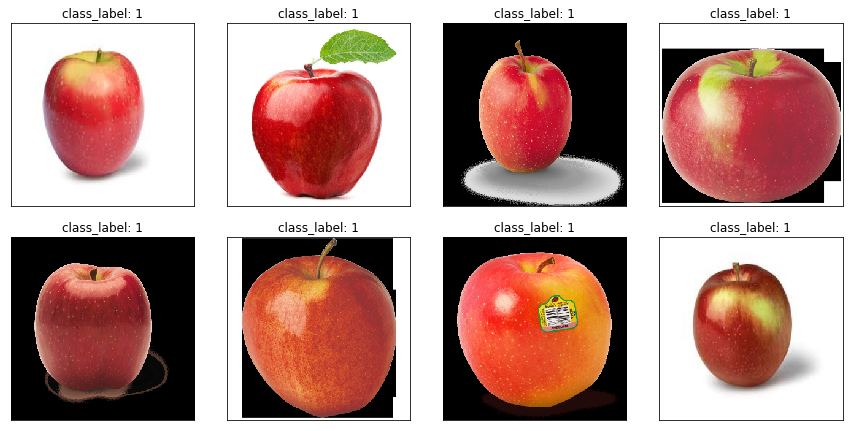

In [12]:
fig = plt.figure(1,figsize=(12,12))
for i in range(8):
    plt.subplot(4,4,i+1)
    plt.tight_layout()
    plt.imshow(x[i][:,:,::-1], interpolation='none')
    plt.title("class_label: {}".format(y[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

## Actual generator

In [13]:
def preprocessing(img,label):
    img = cv2.resize(img,(300,300))
    img = img/255
    #print(label)
    label = np_utils.to_categorical(y = label, num_classes = 5)
    label = label
    return img,label

In [14]:
def data_generator(samples, batch_size=32,shuffle_data=True,resize=300):
    """
    Yields the next training batch.
    Suppose `samples` is an array [[image1_filename,label1], [image2_filename,label2],...].
    """
    num_samples = len(samples)
    while True:
        for offset in range(0, num_samples, batch_size):            
            batch_samples = samples[offset:offset+batch_size]
            X_train = []
            y_train = []
            for batch_sample in batch_samples:                
                img_name = batch_sample[0]
                label = batch_sample[1]
                img =  cv2.imread(os.path.join(root_dir,img_name))
                img,label = preprocessing(img,label)
                X_train.append(img)
                y_train.append(label)            

            X_train = np.array(X_train)
            y_train = np.array(y_train)
            yield X_train, y_train

In [15]:
train_datagen = data_generator(samples,batch_size=8)

x,y = next(train_datagen)
print ('x_shape: ', x.shape)
print ('labels shape: ', y.shape)
print ('labels: ', y)

x_shape:  (8, 300, 300, 3)
labels shape:  (8, 5)
labels:  [[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [16]:
batch_size = 8
num_train_samples = len(train_sample)
num_test_samples = len(test_sample)
train_generator = data_generator(train_sample, batch_size=32)
validation_generator = data_generator(test_sample, batch_size=32)

## Actual Model

In [17]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
model = VGG16(include_top=False, input_shape=(300, 300, 3))
for layer in model.layers:
    layer.trainable = False
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(5, activation='softmax')(class1)
model = Model(inputs=model.inputs, outputs=output)
model.summary()

58900480/58889256 [==============================] - 40s 1us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_____________________________________________________________

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
model.fit_generator(
        train_generator,
        steps_per_epoch=num_train_samples // batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=num_test_samples // batch_size)
model.save_weights('model.h5')

C:\Users\91882\anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1/1 [==============================] - 41s 41s/step - loss: 2.5661 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 6s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 6s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 6s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 7s 7s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 7s 7s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 8s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 6s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 7s 7s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 7s 7s/step - loss: 0.0000e+00 - accuracy: 1.0000


## Checking on test data

In [20]:
os.path.join(root_dir,'test\\apple.jpg')

'C:\\Users\\91882\\Desktop\\LUX.Ai\\Apple classification\\data\\data\\test\\apple.jpg'

In [21]:
img_test =  cv2.imread(os.path.join(root_dir,'test\\apple.jpg'))
img_test = cv2.resize(img_test,(300,300))
img_test = img_test/255

(300, 300, 3)


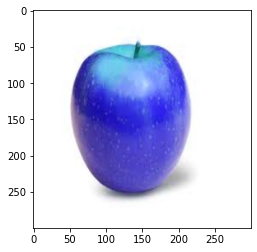

In [22]:
print(img_test.shape)
plt.imshow(img_test)
img_test = img_test.reshape(-1, 300, 300, 3)

In [23]:
pred_class = np.argmax(model.predict(img_test))

In [24]:
if (pred_class == 1):
    print('it is an image of', "Apple")
else:
    print('Model only trained on Apples, please re-train')
    

it is an image of Apple
